In [71]:
# import libs
import numpy as np

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, Flatten

In [72]:
# load data
max_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_words)
print(x_train.shape)
print(x_test.shape)
print(x_train[0])
print(y_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [73]:
# pad sequence
max_length = 100
x_train = pad_sequences(x_train, maxlen = max_length)
x_test = pad_sequences(x_test, maxlen = max_length)
print(x_train.shape)
print(x_test.shape)

(25000, 100)
(25000, 100)


In [74]:
# convert label to one-hot vector
classes = np.max(y_train) + 1
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(25000, 2)
(25000, 2)
[ 0.  1.]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 98, 32)            3104      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 49, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 258       
Total params: 364,194
Trainable params: 364,194
Non-trainable params: 0
_________________________________________________________________
None

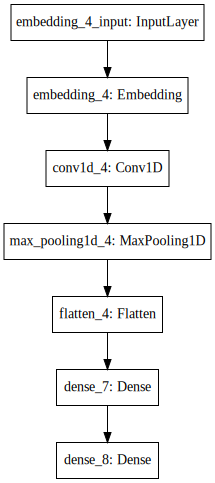

In [75]:
# build model
embedding_dim = 32
model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = max_length))
model.add(Conv1D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
# classifier
model.add(Dense(units = classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

print(model.summary())
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog = 'dot', format = 'svg'))

In [76]:
# train model
batch_size = 32
epochs = 2
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/2
25000/25000 [==============================] - 22s 869us/step - loss: 0.4326 - acc: 0.7748
Epoch 2/2
25000/25000 [==============================] - 9s 351us/step - loss: 0.2490 - acc: 0.8989


In [77]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose = 0)
print('accuracy = {}'.format(score[1]))

accuracy = 0.855
